# Komalben Suthar  
## MSCS 634 – Lab 2: KNN and RNN Classifier Performance  


In [ ]:
# Step 1: Load and Prepare the Dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Basic data exploration
print("Shape of dataset:", X.shape)
print("\nFeature names:\n", wine.feature_names)
print("\nClass distribution:\n", y.value_counts())

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Shape of dataset: (178, 13)

Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K = {k} → Accuracy: {acc:.4f}")


K = 1 → Accuracy: 0.7778
K = 5 → Accuracy: 0.8056
K = 11 → Accuracy: 0.8056
K = 15 → Accuracy: 0.8056
K = 21 → Accuracy: 0.8056


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=0)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"Radius = {r} → Accuracy: {acc:.4f}")


Radius = 350 → Accuracy: 0.7222
Radius = 400 → Accuracy: 0.6944
Radius = 450 → Accuracy: 0.6944
Radius = 500 → Accuracy: 0.6944
Radius = 550 → Accuracy: 0.6667
Radius = 600 → Accuracy: 0.6667


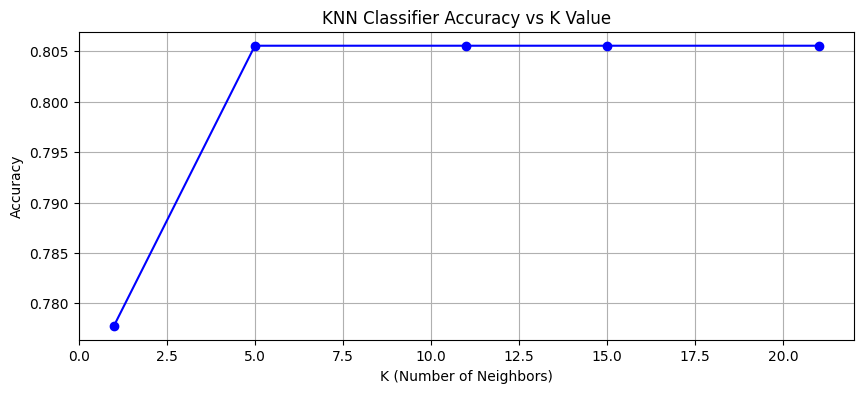

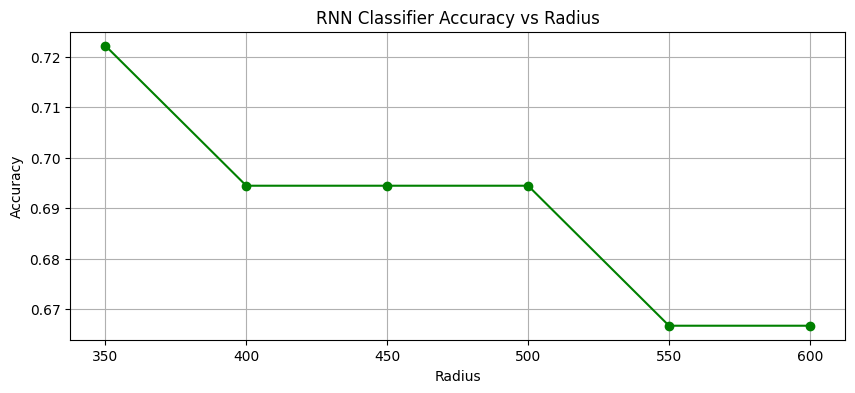

In [ ]:
import matplotlib.pyplot as plt

# KNN accuracy trend
plt.figure(figsize=(10,4))
plt.plot(k_values, knn_accuracies, marker='o', color='blue')
plt.title('KNN Classifier Accuracy vs K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# RNN accuracy trend
plt.figure(figsize=(10,4))
plt.plot(radius_values, rnn_accuracies, marker='o', color='green')
plt.title('RNN Classifier Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


### Observations

- For KNN:
  - Accuracy was highest at K = 5, 11, 15, 21
  - Very small K values might lead to overfitting; larger K values can smooth decision boundaries.

- For RNN:
  - Performance varied with radius; too small a radius may ignore valid neighbors, while too large may include irrelevant samples.

### When to Use Which:
- **KNN** is preferred when the dataset is well-distributed and distance between samples is meaningful.
- **RNN** is better when data density varies, as it adapts the number of neighbors based on the given radius.